Free text analyses on Q35, 52.1-5, Q59

In [1]:
from utils import *

sns.set(font_scale=2)
sns.set_style('white')
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

# Q35

(174, 3)


0
Research focus is elsewhere                         49
Lack of ILC cell models                              8
Lack of facilities, resources, or expertise         37
Professional role does not involve cell model s...  51
Other reasons                                       11
Not aware of or familiar with ILC cell models        6
Research or study still in planning or future s...  12

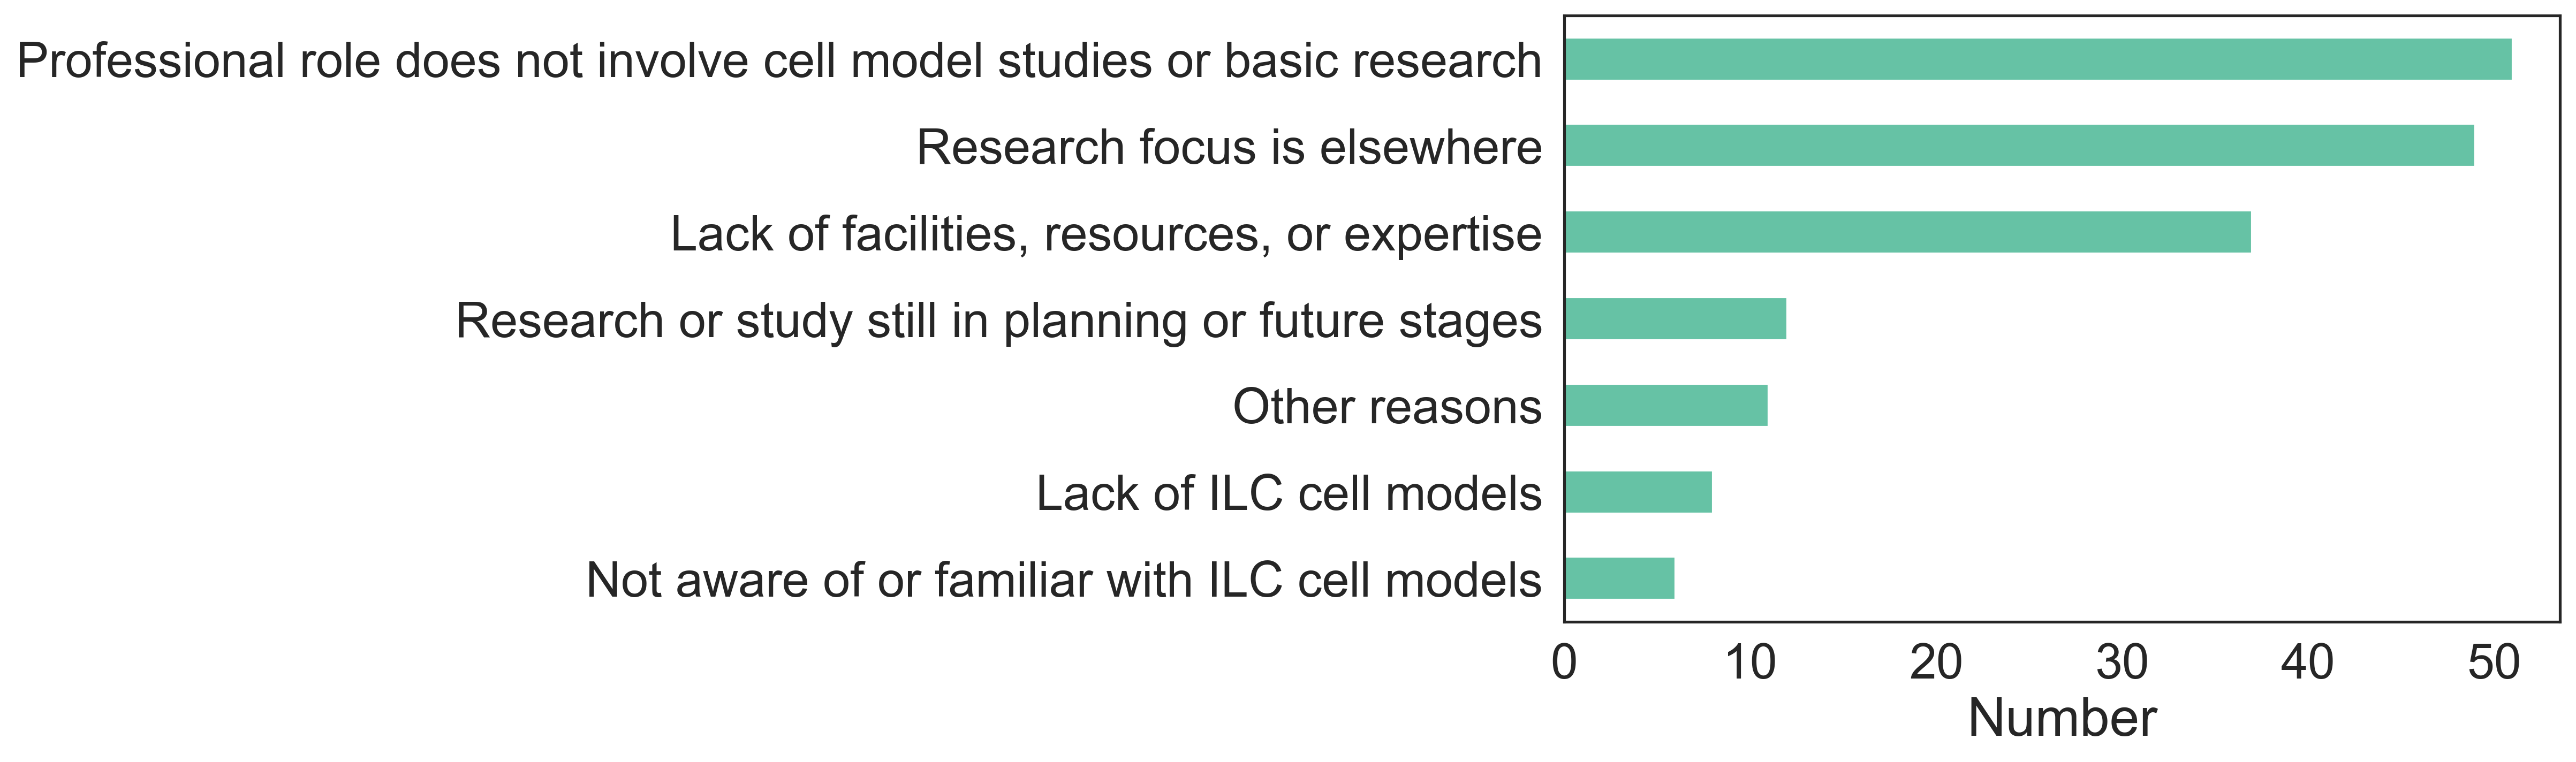

In [2]:
dat = pd.read_csv('../data/q35_reasons_v1.csv', index_col=0) 

fig,ax = plt.subplots(figsize=(8,5))
res = pd.Series(Counter(dat['reason']))

print(dat.shape)
res.sort_values(ascending=True).plot.barh(ax=ax, color='#66c2a5')

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

ax.set_xlabel('Number')
pd.DataFrame(res)

# Q51

In [3]:
dat = pd.read_csv('../data/q52_gptgroup_finalcurated.csv', index_col=0)
print(dat.shape)

q_numbers, answers = [], []
for _, row in dat.iterrows():

    tmp = row['Theme'].split('; ')
    
    answers.extend(tmp)
    q_numbers.extend(len(tmp) * [row['Subquestion Number']])
    
dat_new = pd.DataFrame({'q':q_numbers, 'group':answers})
print(dat_new.shape)

dat_new['Specialty'] = ['Surgeon' if x==1 else 'Medical Oncologist' if x==2 else 'Radiation Oncologist' if x==3\
           else 'Gynecologist' if x==4 else 'Other' for x in dat_new['q']]
dat_new 

(1260, 5)
(1318, 2)


q                                              group Specialty
0     1  Communication and Emotional and Psychological ...   Surgeon
1     1                   Surgery and Procedural Decisions   Surgeon
2     1             Recurrence, Metastasis, and Monitoring   Surgeon
3     1                   Surgery and Procedural Decisions   Surgeon
4     1                   Surgery and Procedural Decisions   Surgeon
...  ..                                                ...       ...
1313  5                            Diagnosis and Detection     Other
1314  5             Recurrence, Metastasis, and Monitoring     Other
1315  5  Diagnosis and Detection, Recurrence, Metastasi...     Other
1316  5             Recurrence, Metastasis, and Monitoring     Other
1317  5             Recurrence, Metastasis, and Monitoring     Other

[1318 rows x 3 columns]

<AxesSubplot:>

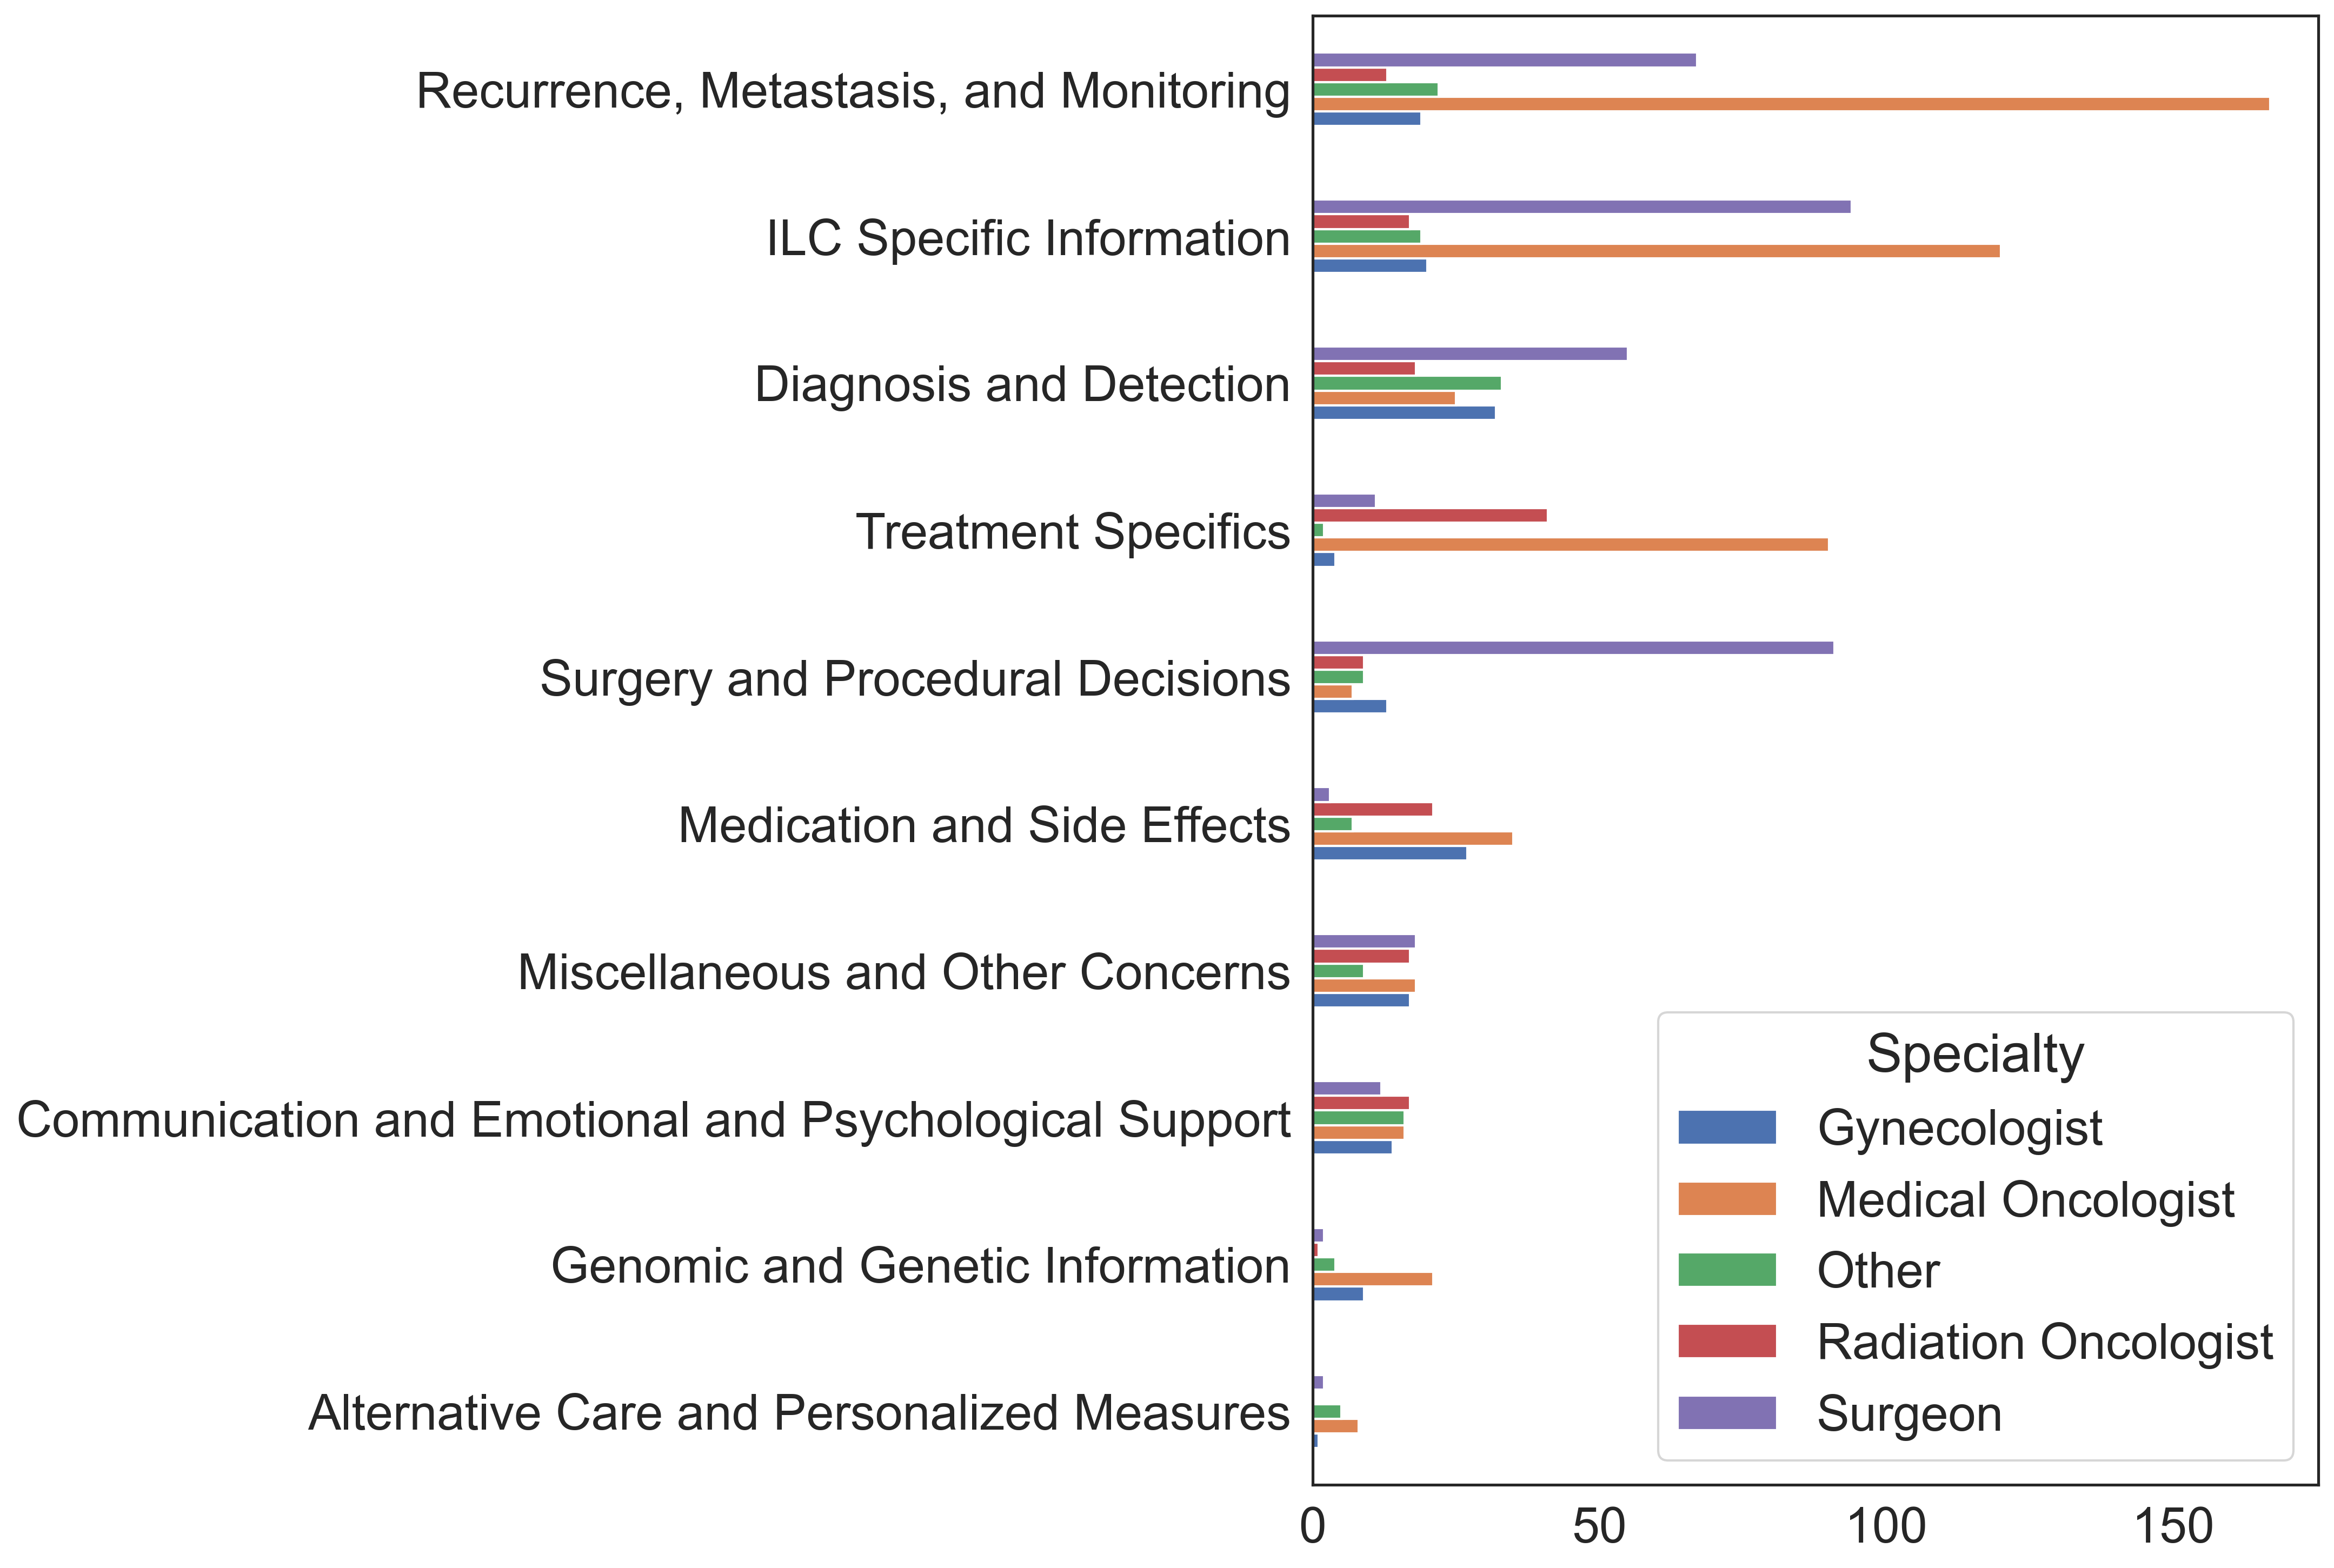

In [4]:
rankings = pd.Series(Counter(dat_new['group'])).sort_values(ascending=True)[-10:].index

res = dat_new.groupby(['group','Specialty']).size().unstack().fillna(0).loc[rankings,:]

fig,ax = plt.subplots(figsize=(8,12))
res.plot.barh(ax=ax)

(1318, 3)


0
Alternative Care and Personalized Measures           16
Genomic and Genetic Information                      37
Communication and Emotional and Psychological S...   75
Miscellaneous and Other Concerns                     79
Medication and Side Effects                          93
Surgery and Procedural Decisions                    129
Treatment Specifics                                 148
Diagnosis and Detection                             163
ILC Specific Information                            270
Recurrence, Metastasis, and Monitoring              288

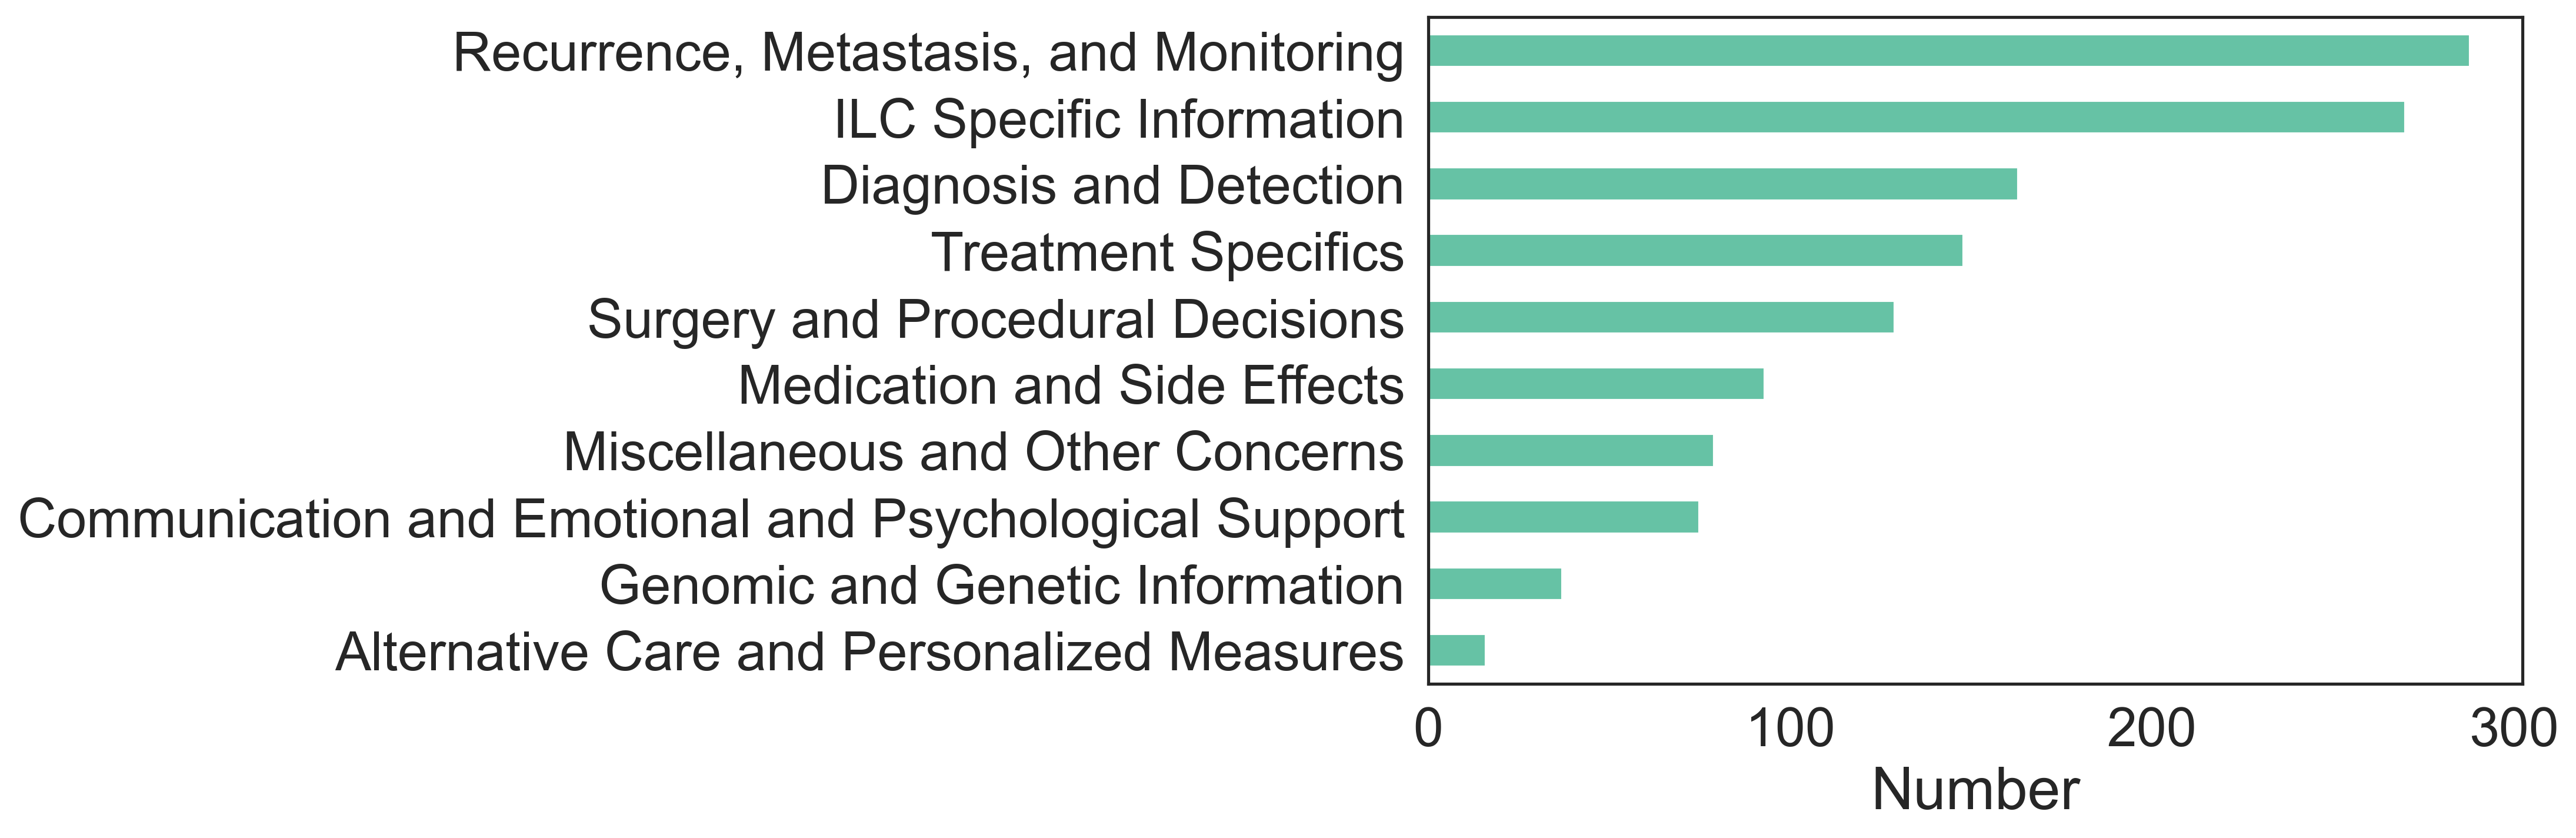

In [5]:
fig,ax = plt.subplots(figsize=(8,5))
res = pd.Series(Counter(dat_new['group'])).sort_values(ascending=True)[-10:]

print(dat_new.shape)
res.plot.barh(ax=ax, color='#66c2a5')

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

ax.set_xlabel('Number')
pd.DataFrame(res)

# Q59

0
Gut microbiome                                       1.0
Big data and AI                                      2.0
IO                                                   2.0
MRI                                                  3.0
Neo-adjuvant txt                                     3.0
Meta-bolism                                          4.0
race disparities                                     5.0
pregancy, breast feeding, contraception hrt          5.0
Dormancy late recurrence                             7.0
ILC variants                                         7.0
PET                                                  8.0
age                                                  8.0
ctDNA, liquid biopsy                                 9.0
environ-ment. Nutrition. Alternative approaches      9.0
chemo-therapy                                       10.0
genomic predictors markers                          12.0
AI and SERD (new drugs, duration)                   13.0
awareness education                                 19.0
Genetic screening. Germline mutations. Familiar...  27.0

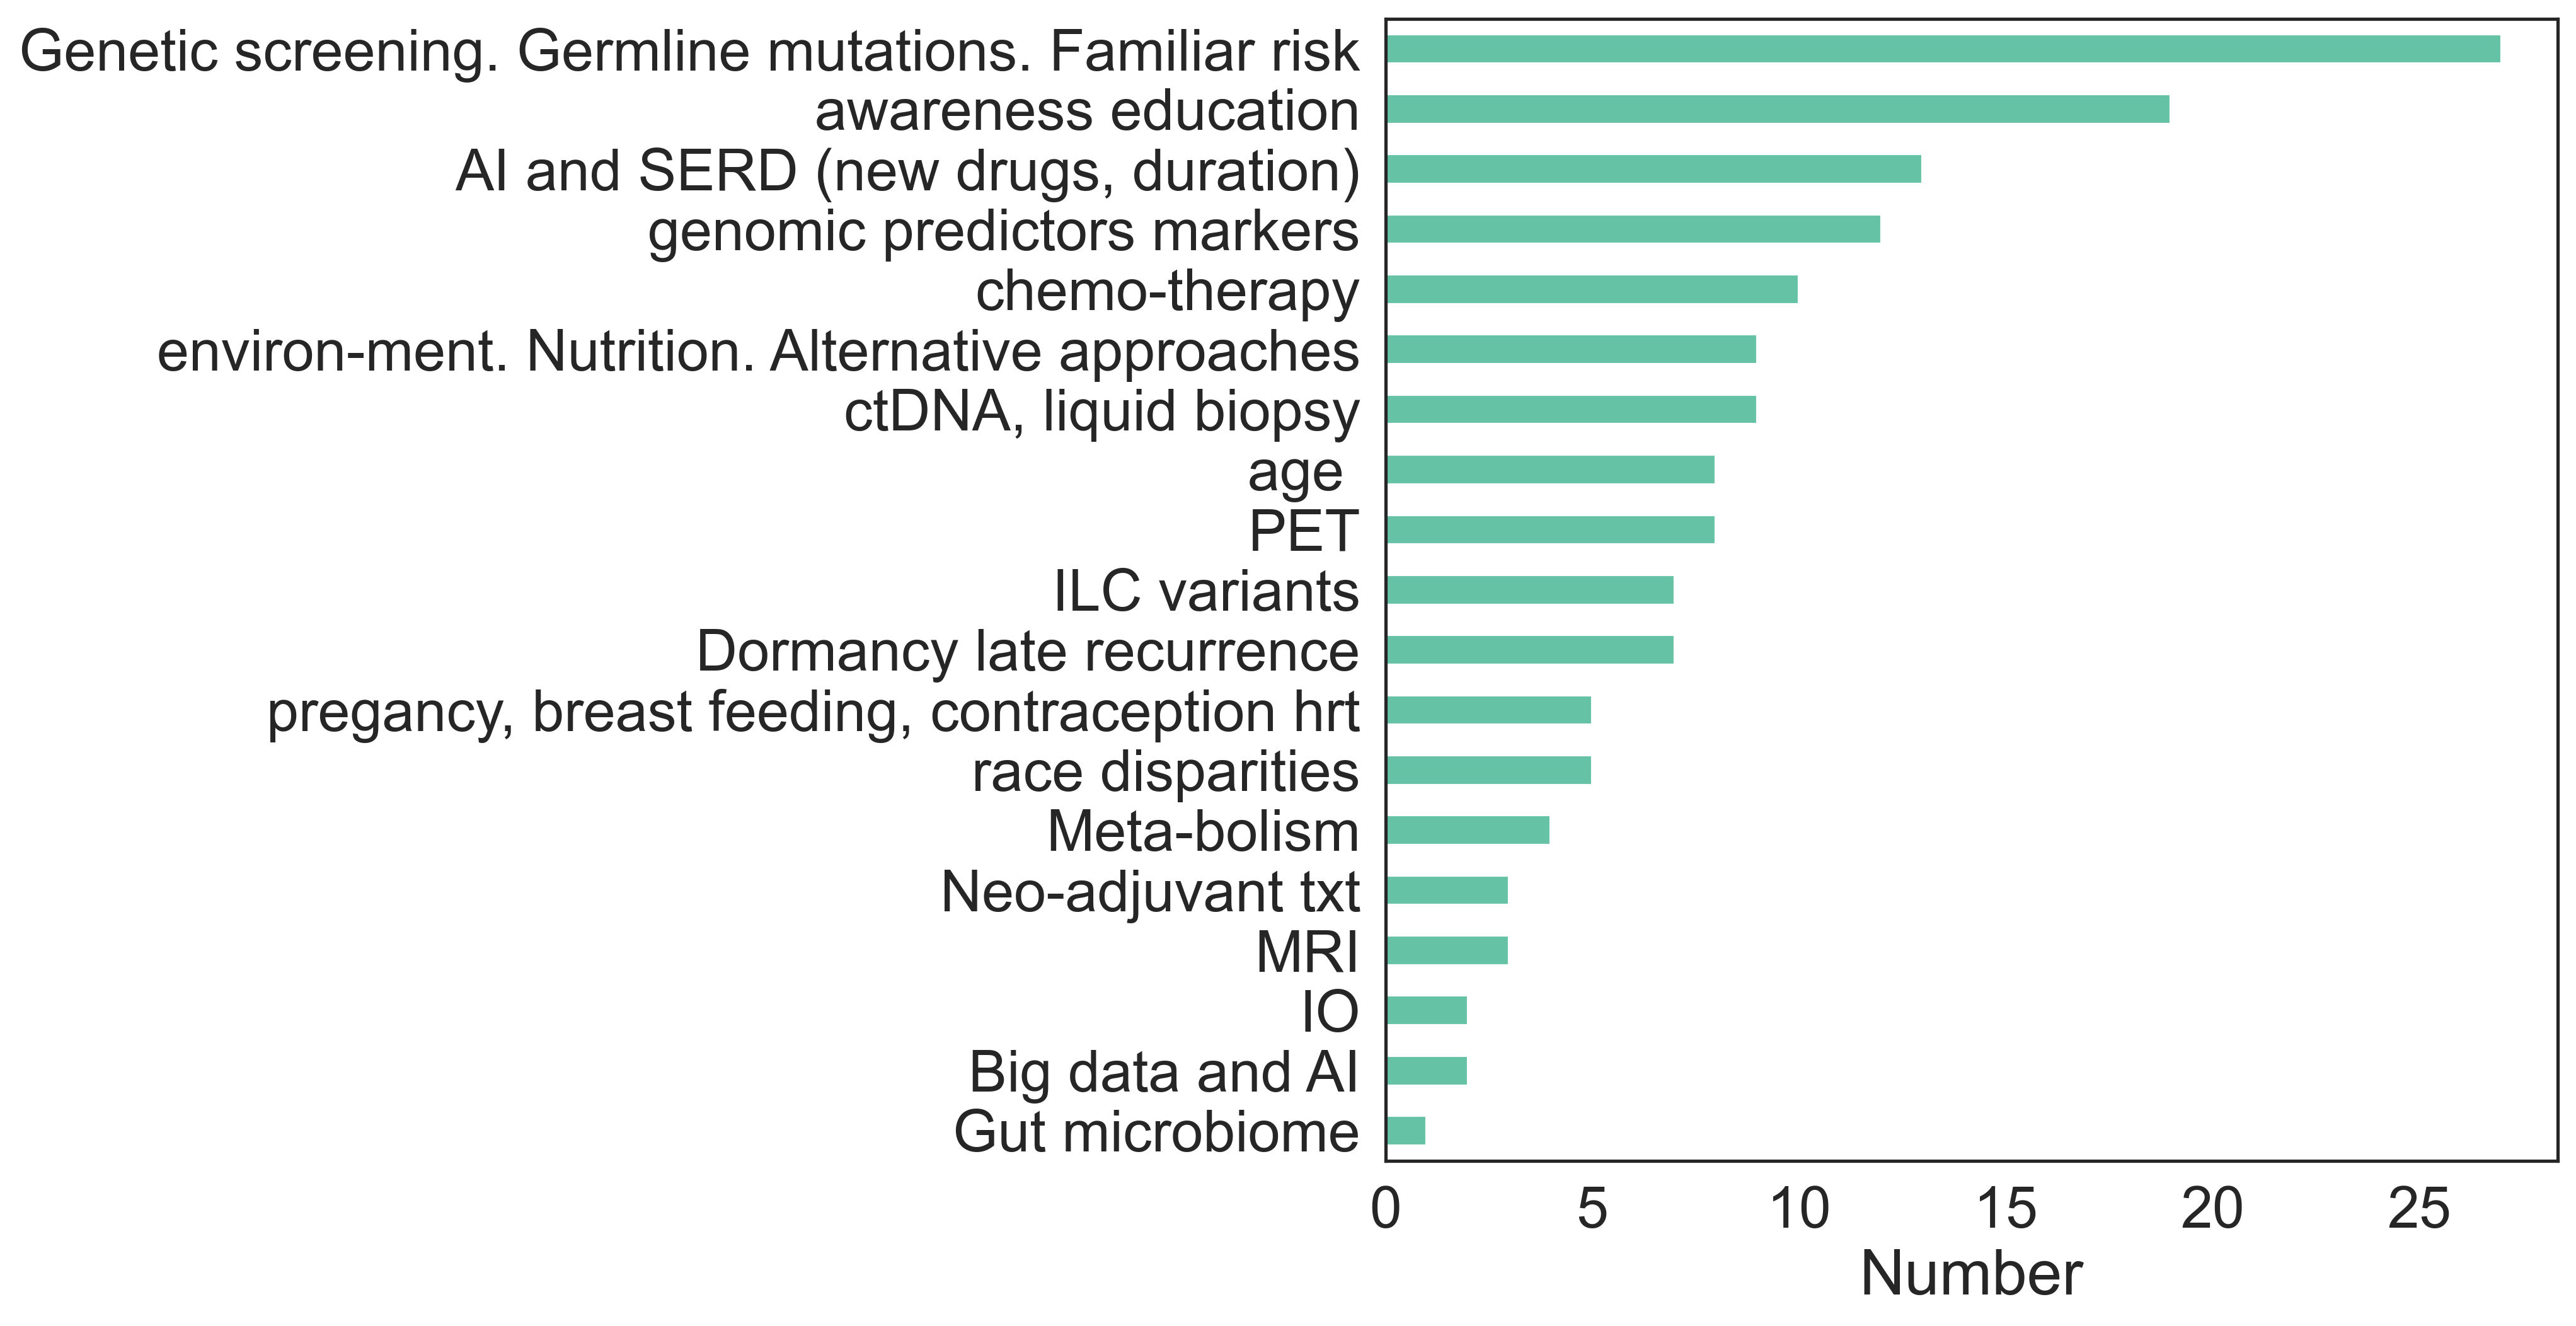

In [6]:
df = pd.read_excel('../data/q59_manual_out.xlsx', sheet_name="Sheet1", index_col=0).iloc[:,2:]

fig,ax = plt.subplots(figsize=(8,8))

res = df.sum(axis=0).sort_values(ascending=True)
res.plot.barh(ax=ax, color='#66c2a5')

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

ax.set_xlabel('Number')
pd.DataFrame(res)

# Other figures replot

## 01

In [7]:
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world

/var/folders/s4/1f8b2fn9053csdysy0gsmzh80000gn/T/ipykernel_69985/3322855671.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


pop_est      continent                      name iso_a3  gdp_md_est  \
0       889953.0        Oceania                      Fiji    FJI        5496   
1     58005463.0         Africa                  Tanzania    TZA       63177   
2       603253.0         Africa                 W. Sahara    ESH         907   
3     37589262.0  North America                    Canada    CAN     1736425   
4    328239523.0  North America  United States of America    USA    21433226   
..           ...            ...                       ...    ...         ...   
172    6944975.0         Europe                    Serbia    SRB       51475   
173     622137.0         Europe                Montenegro    MNE        5542   
174    1794248.0         Europe                    Kosovo    -99        7926   
175    1394973.0  North America       Trinidad and Tobago    TTO       24269   
176   11062113.0         Africa                  S. Sudan    SSD       11998   

                                              geometry  
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
..                                                 ...  
172  POLYGON ((18.82982 45.90887, 18.82984 45.90888...  
173  POLYGON ((20.07070 42.58863, 19.80161 42.50009...  
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...  
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...  
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...  

[177 rows x 6 columns]

In [8]:
world.to_csv('../data/world.csv')

In [9]:
regions = pd.Series(Counter(pd.read_csv('../data/q63_ListOfCountries.csv')['Countries'].fillna('Misc'))).sort_values(ascending=False)

regions.to_csv('../data/q63_summary.csv')

In [10]:
regions.sum()

1979

In [11]:
regions = pd.read_csv('../data/q63_summary.csv', index_col=0)

regions['country'] = regions.index
regions['count'] = regions['0']
regions['ratio'] = regions['0'] / regions['0'].sum()

regions

0  \
Misc                                                676   
United States of America                            580   
United Kingdom of Great Britain and Northern Ir...  177   
Ireland                                              98   
Netherlands                                          57   
...                                                 ...   
Albania                                               1   
Finland                                               1   
Denmark                                               1   
Israel                                                1   
Dominican Republic                                    1   

                                                                                              country  \
Misc                                                                                             Misc   
United States of America                                                     United States of America   
United Kingdom of Great Britain and Northern Ir...  United Kingdom of Great Britain and Northern I...   
Ireland                                                                                       Ireland   
Netherlands                                                                               Netherlands   
...                                                                                               ...   
Albania                                                                                       Albania   
Finland                                                                                       Finland   
Denmark                                                                                       Denmark   
Israel                                                                                         Israel   
Dominican Republic                                                                 Dominican Republic   

                                                    count     ratio  
Misc                                                  676  0.341587  
United States of America                              580  0.293077  
United Kingdom of Great Britain and Northern Ir...    177  0.089439  
Ireland                                                98  0.049520  
Netherlands                                            57  0.028802  
...                                                   ...       ...  
Albania                                                 1  0.000505  
Finland                                                 1  0.000505  
Denmark                                                 1  0.000505  
Israel                                                  1  0.000505  
Dominican Republic                                      1  0.000505  

[67 rows x 4 columns]

/var/folders/s4/1f8b2fn9053csdysy0gsmzh80000gn/T/ipykernel_69985/3193499575.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.country[0] = 'United States'
/var/folders/s4/1f8b2fn9053csdysy0gsmzh80000gn/T/ipykernel_69985/3193499575.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.country[1] = 'United Kingdom'


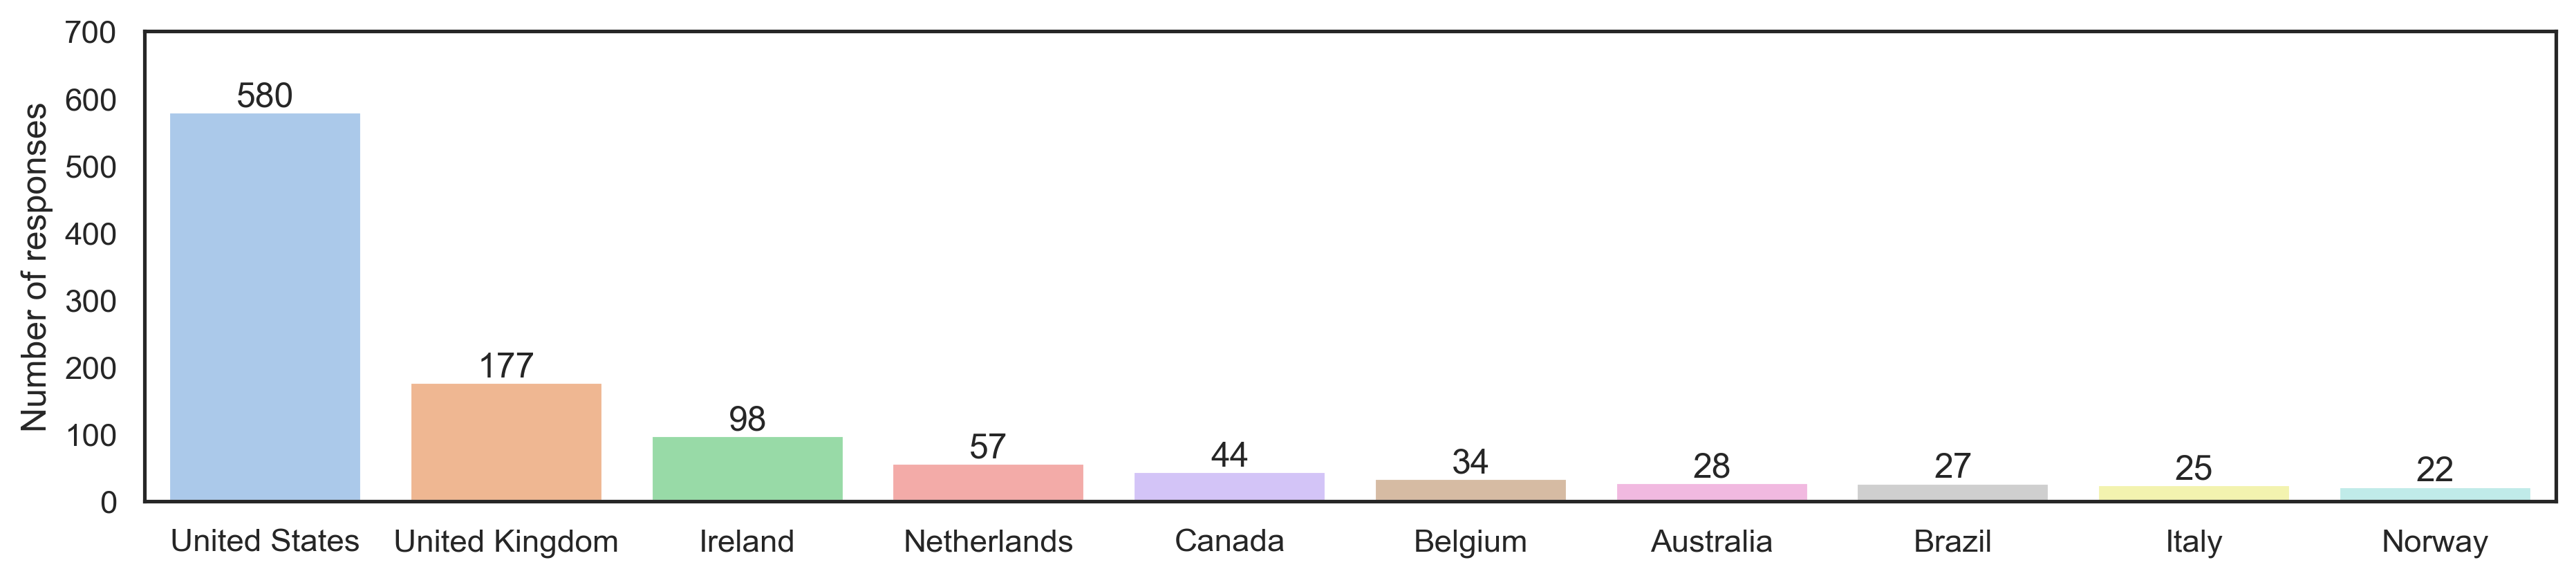

In [12]:
sns.set(font_scale=1)
sns.set_style('white')

df = regions.iloc[1:11,:]

df.country[0] = 'United States'
df.country[1] = 'United Kingdom'
# colors = ['#66c2a5']#, '#41ae76']
fig,ax = plt.subplots(figsize=(15,3))

sns.barplot(x='country',y='count', 
            data=df, ax=ax, palette='pastel')
# ax.set_ylabel('Percentage')
# # ax.set_title('Stacked Bar Plot')
ax.set_xlabel('')
ax.set_ylim([0,700])
ax.set_ylabel('Number of responses')
# plt.xticks(rotation=0)
# plt.tight_layout()
# plt.show()

for idx,p in enumerate(ax.patches):
    ax.annotate(f"{df['count'][idx]}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')  # Reduced offset to 5


In [13]:
for name in regions.index:
#     print(name, name in world['name'].values)
    if not name in world['name'].values:
        print(name)

Misc
United Kingdom of Great Britain and Northern Ireland
Brunei Darussalam
Russian Federation
C么te d'Ivoire
Czech Republic
Malta
Dominican Republic


In [14]:
# Define the regions and their percentages

regions_new = regions.loc[[x for x in regions.index if x not in ['Misc','Malta',"C_te d'Ivoire"]],:]
regions_new

0             country  \
United States of America                            580       United States   
United Kingdom of Great Britain and Northern Ir...  177      United Kingdom   
Ireland                                              98             Ireland   
Netherlands                                          57         Netherlands   
Canada                                               44              Canada   
...                                                 ...                 ...   
Albania                                               1             Albania   
Finland                                               1             Finland   
Denmark                                               1             Denmark   
Israel                                                1              Israel   
Dominican Republic                                    1  Dominican Republic   

                                                    count     ratio  
United States of America                              580  0.293077  
United Kingdom of Great Britain and Northern Ir...    177  0.089439  
Ireland                                                98  0.049520  
Netherlands                                            57  0.028802  
Canada                                                 44  0.022233  
...                                                   ...       ...  
Albania                                                 1  0.000505  
Finland                                                 1  0.000505  
Denmark                                                 1  0.000505  
Israel                                                  1  0.000505  
Dominican Republic                                      1  0.000505  

[65 rows x 4 columns]

/var/folders/s4/1f8b2fn9053csdysy0gsmzh80000gn/T/ipykernel_69985/3182622003.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


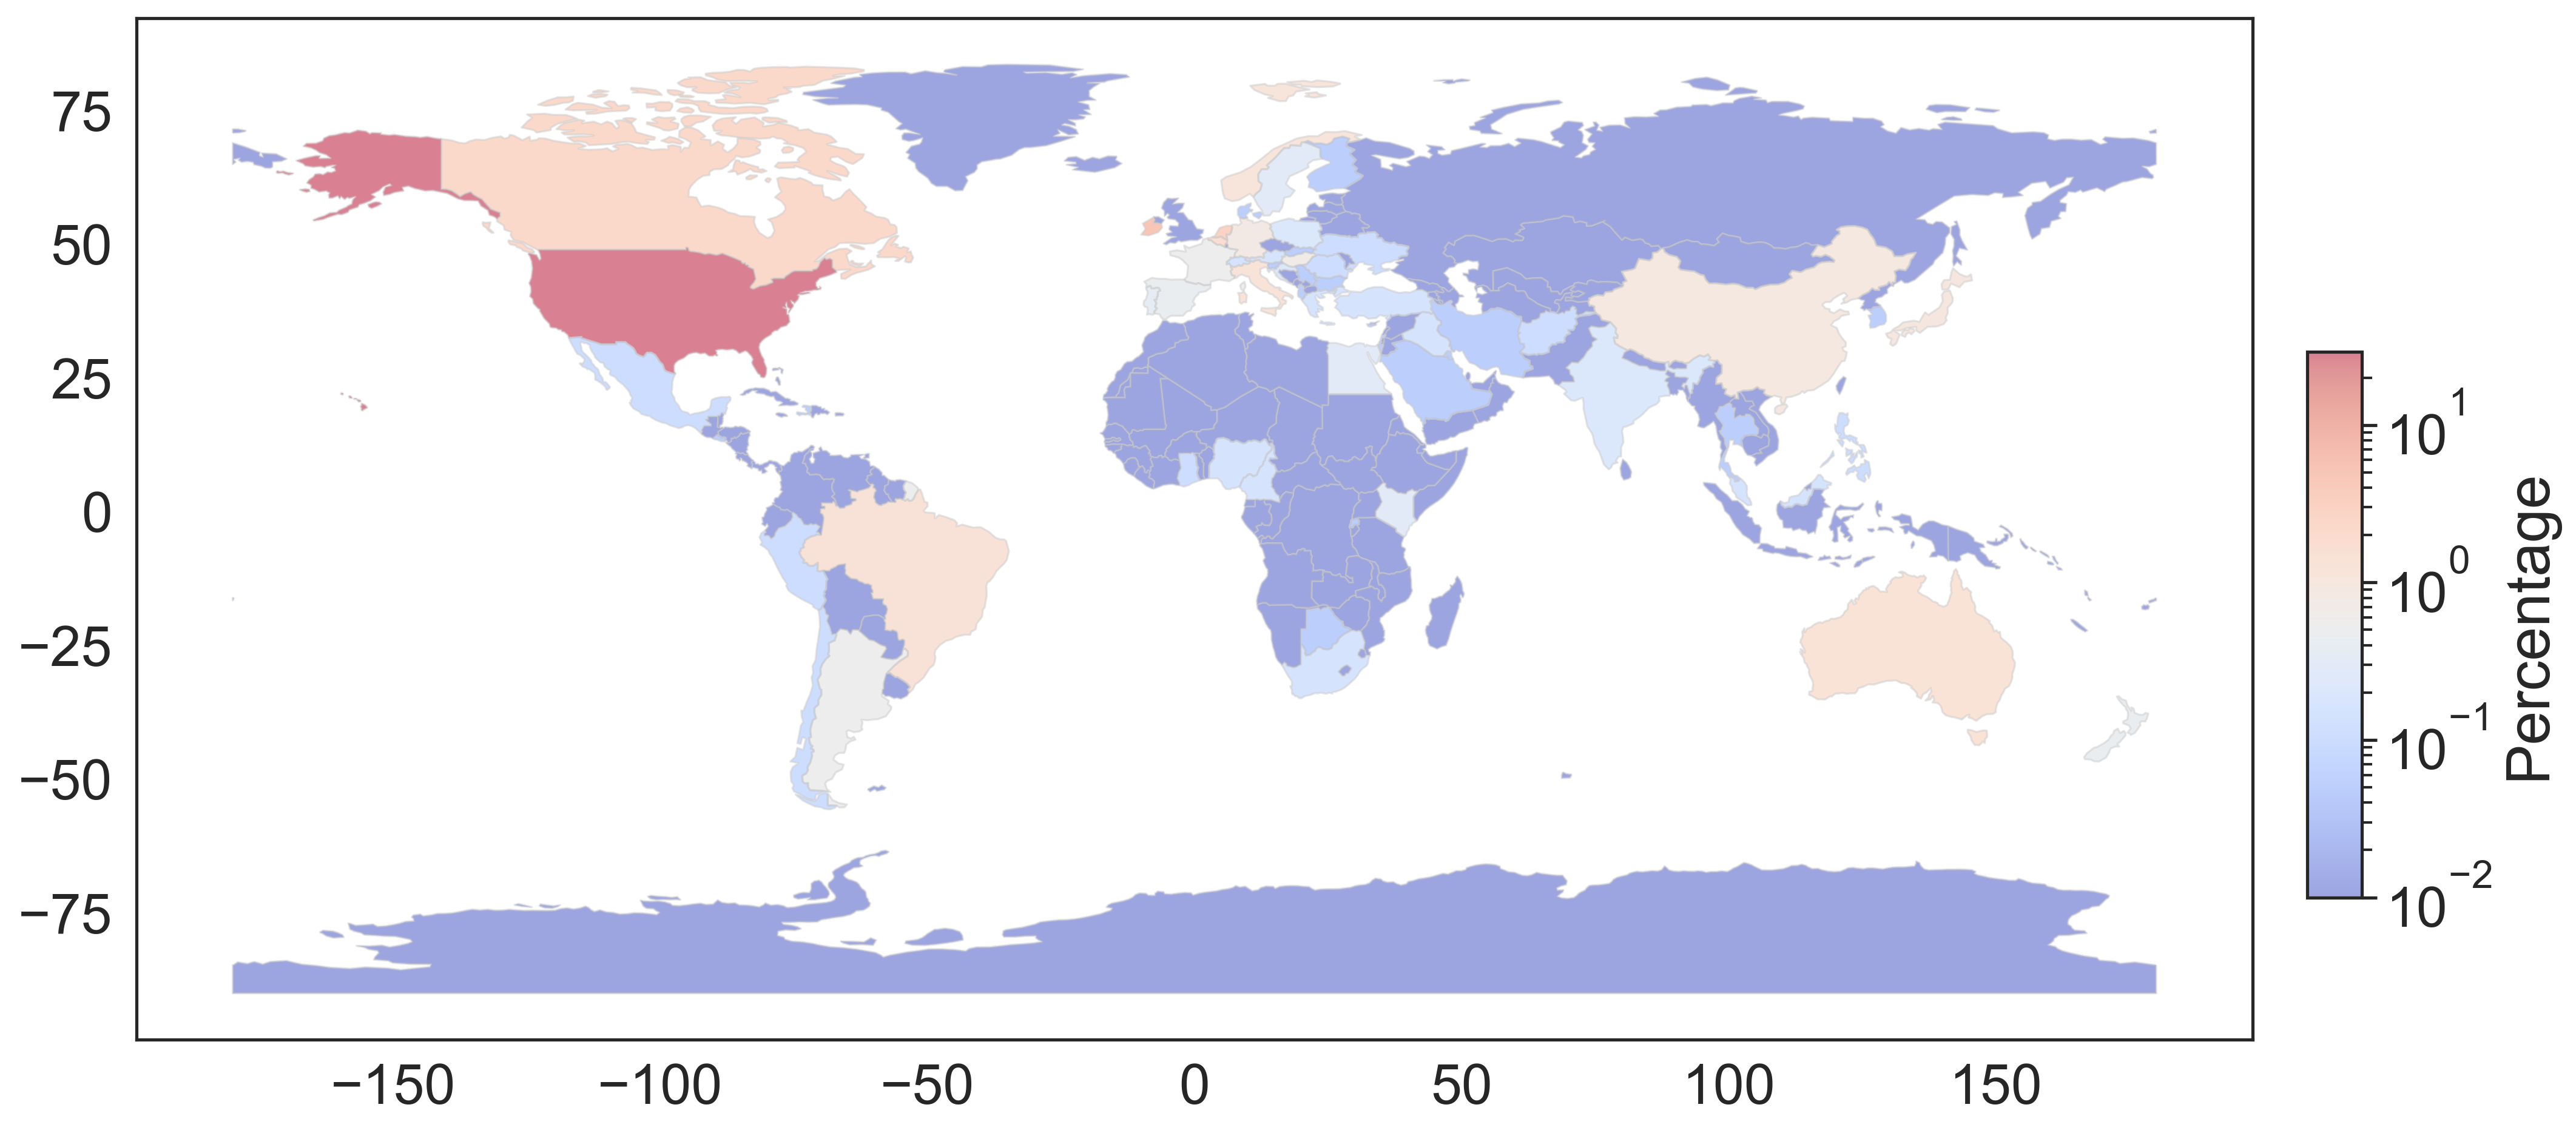

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
sns.set(font_scale=2)
sns.set_style('white')

# Load the world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


# Create a new column in the dataframe for the percentages
world['Percentage'] = world['name'].map(regions_new['ratio']) * 100
world['Percentage'].fillna(0.01, inplace=True)
norm = LogNorm(vmin=world['Percentage'].min(), vmax=world['Percentage'].max())

# Plot the map
fig, ax = plt.subplots(figsize=(15, 10))
divider = plt.cm.ScalarMappable(norm=norm, cmap='coolwarm')

world.plot(column='Percentage', cmap='coolwarm',alpha=.5,norm=norm, \
           linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)
# ax.set_title('World Map Colored by Percentage')

cax = fig.add_axes([0.92, 0.3, 0.02, 0.3])  # [left, bottom, width, height]
fig.colorbar(divider, alpha=.5,cax=cax, orientation='vertical', label='Percentage')

plt.show()


## 02

1910
21.62303626537323
19.685864448547363
43.455496430397034
15.235601365566254


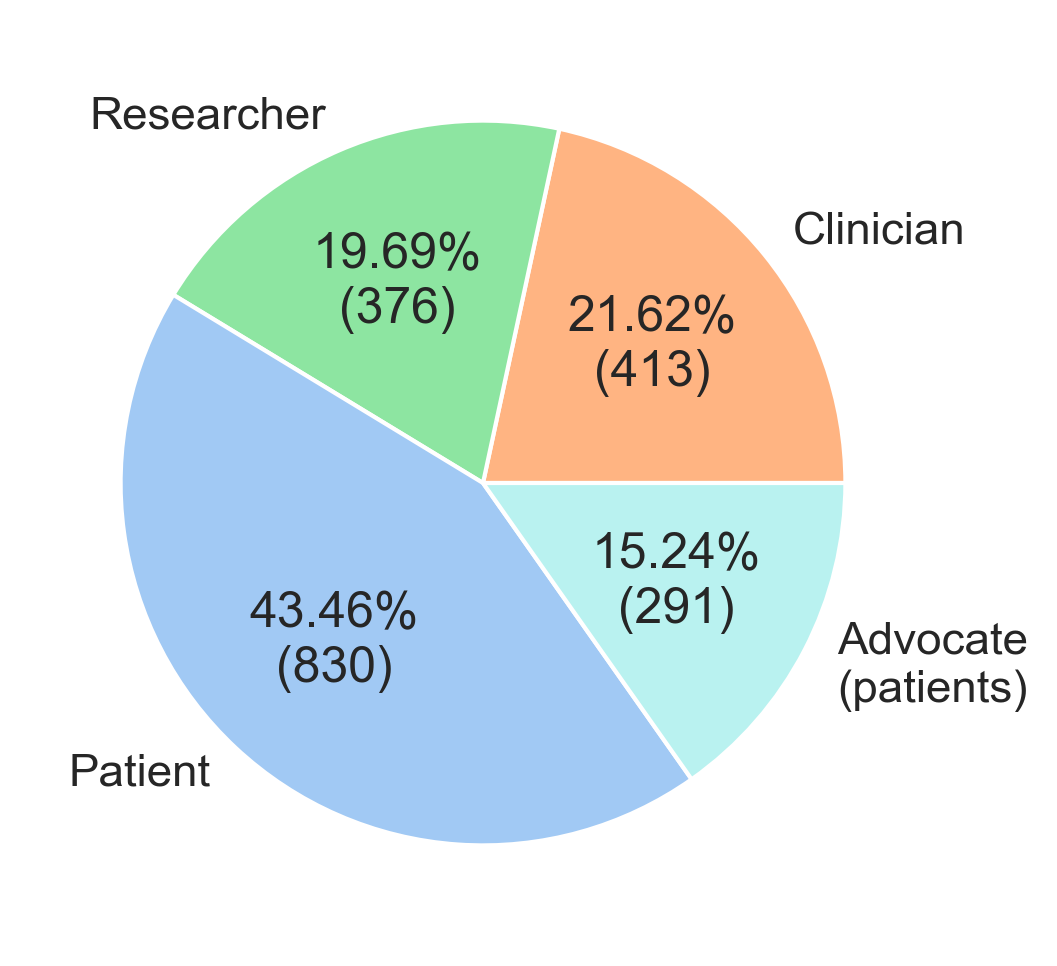

In [16]:
sns.set(font_scale=1)
sns.set_style('white')

df = pd.read_excel('../data/poster_data.xlsx', sheet_name='2')
total = df['Number'].sum(axis=0); print(total)

def my_fmt(x):
    print(x)
    return '{:.2f}%\n({:.0f})'.format(x, x*total/100)


# Create the pie chart
plt.figure(figsize=(4,4))

pastel_palette = sns.color_palette("pastel")
selected_colors = [pastel_palette[1], pastel_palette[2], pastel_palette[0], pastel_palette[9]]

plt.pie(x=df['Number'], labels=df['Group'], colors=selected_colors, 
        autopct=my_fmt)

# Add a title
# plt.title('Pie Chart with Colorblind-Friendly Colors')

# Display the plot
plt.show()

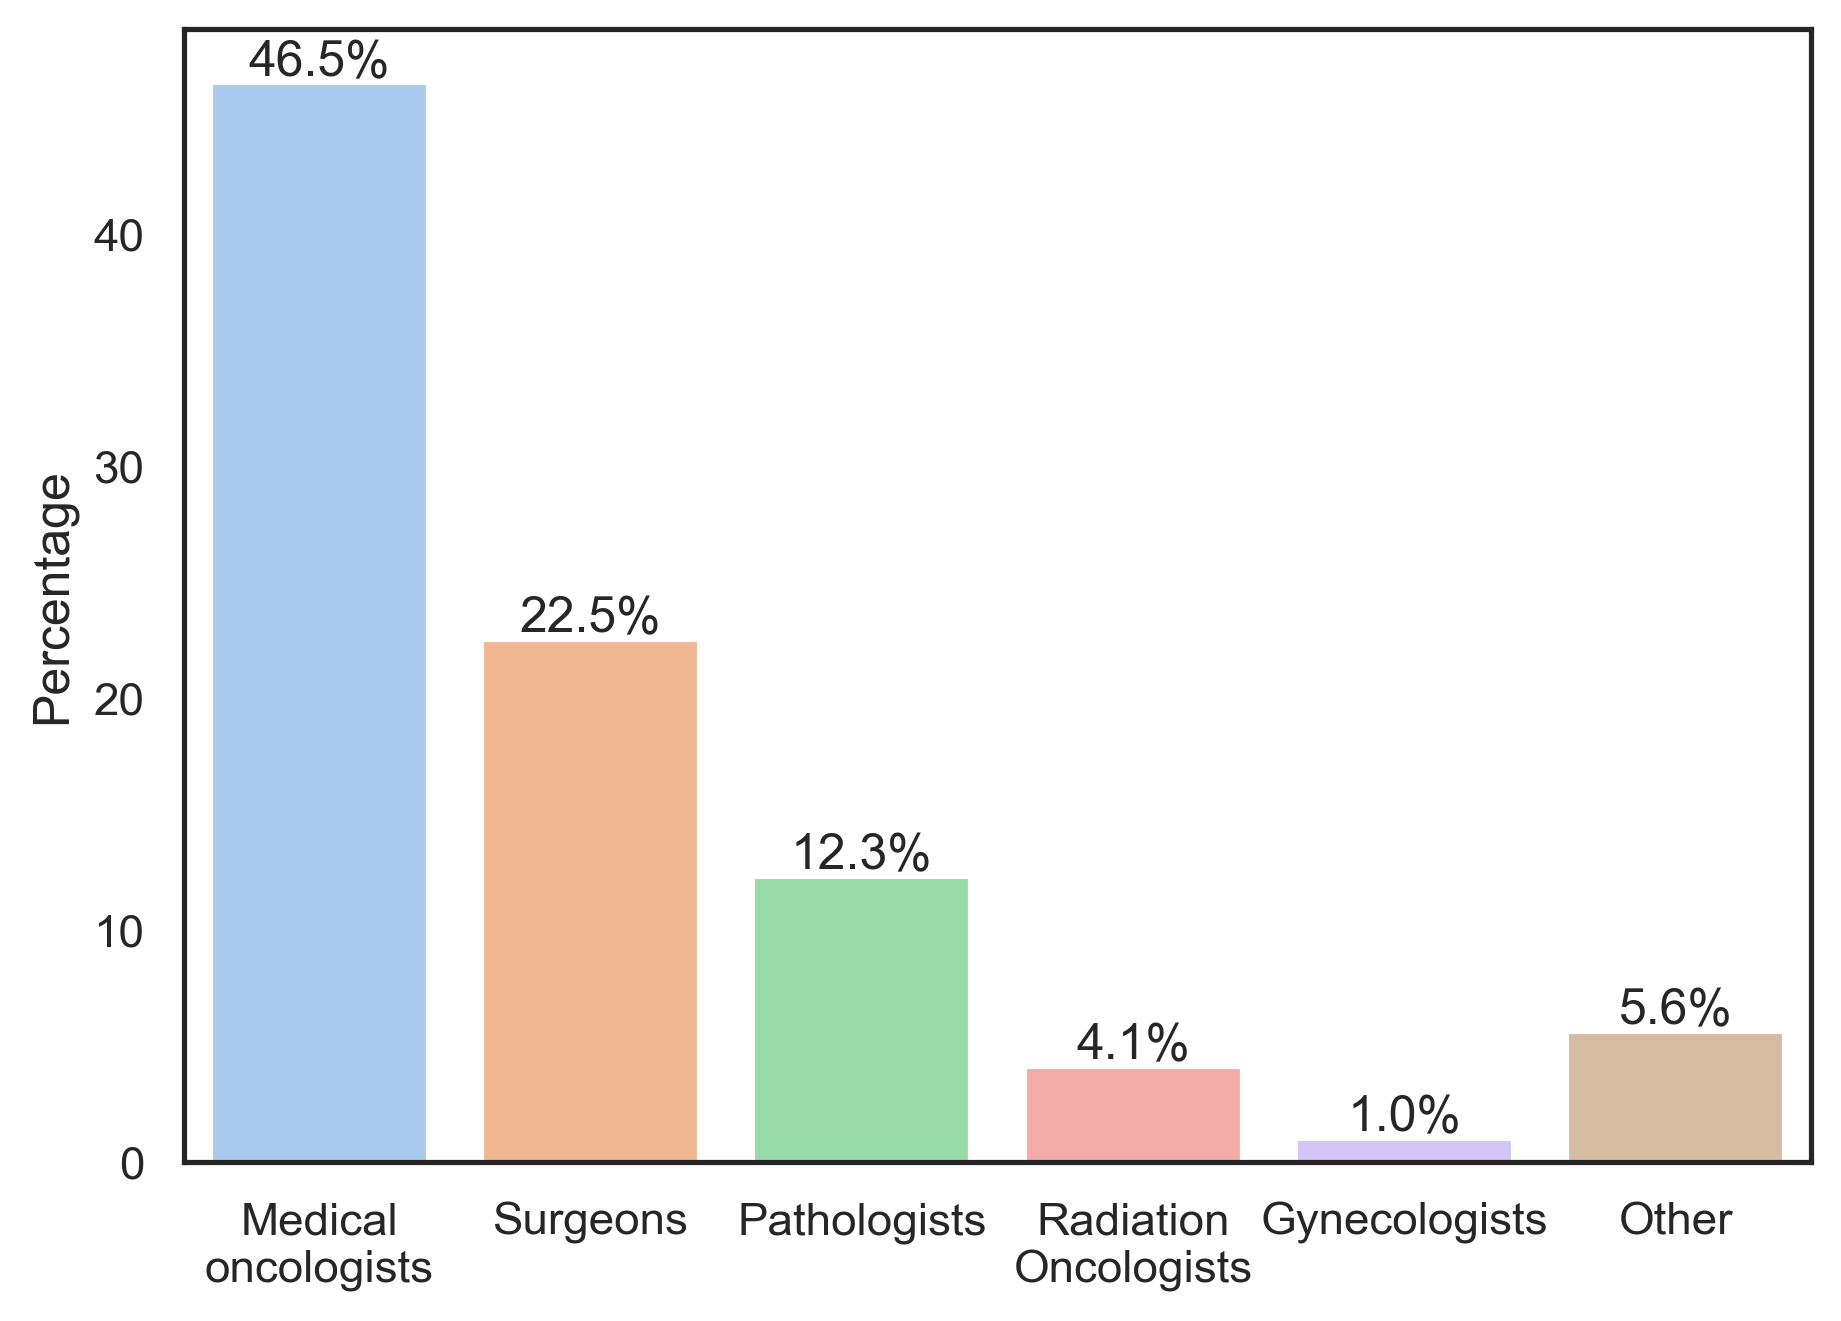

In [17]:
sns.set(font_scale=1)
sns.set_style('white')

df = pd.read_excel('../data/poster_data.xlsx', \
                   sheet_name='3')

# colors = ['#66c2a5']#, '#41ae76']
fig,ax = plt.subplots(figsize=(7,5))

sns.barplot(x='Name',y='Percentage',
            data=df, ax=ax, palette='pastel')
# ax.set_ylabel('Percentage')
# # ax.set_title('Stacked Bar Plot')
ax.set_xlabel('')
# plt.xticks(rotation=0)
# plt.tight_layout()
# plt.show()

for idx,p in enumerate(ax.patches):
    ax.annotate(f"{df['Percentage'][idx]}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')  # Reduced offset to 5


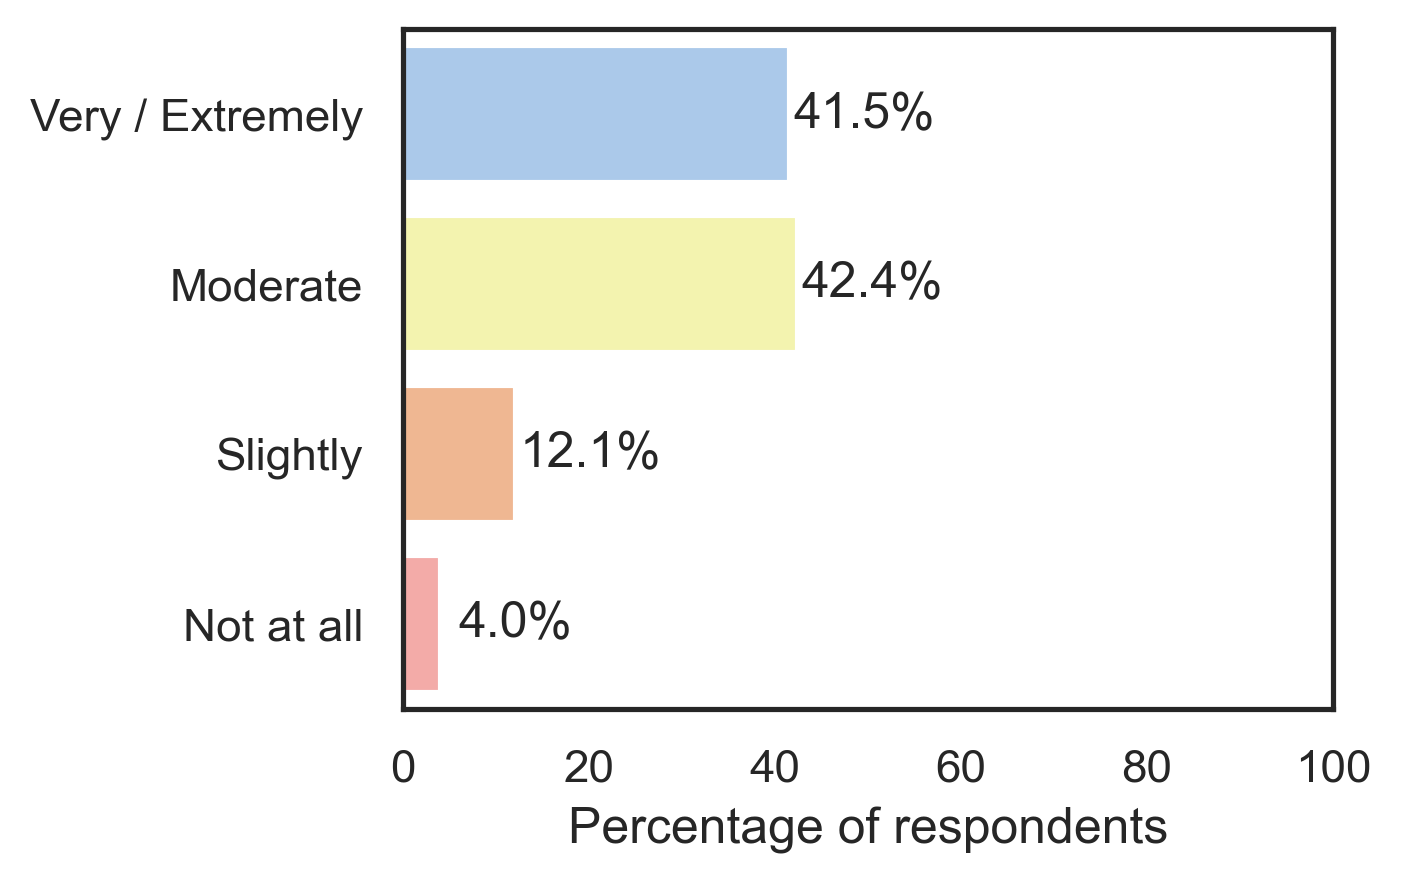

In [18]:
sns.set(font_scale=1)
sns.set_style('white')

df = pd.read_excel('../data/poster_data.xlsx', \
                   sheet_name='4.1')[::-1]

fig,ax = plt.subplots(figsize=(4,3))

pastel_palette = sns.color_palette("pastel")
selected_colors = [pastel_palette[0], pastel_palette[8], pastel_palette[1], pastel_palette[3]]

sns.barplot(y='Name',x='Percentage', orient='h',
            data=df, ax=ax, palette=selected_colors)

ax.set_ylabel('')
ax.set_xlim([0,100])
ax.set_xlabel('Percentage of respondents')

for idx, p in enumerate(ax.patches):
    width = p.get_width()

    percentage_value = df.iloc[idx]['Percentage']

    ax.annotate(f'{percentage_value}%', (width, p.get_y() + p.get_height() / 2),
                ha='center', va='center', xytext=(18, 0), textcoords='offset points')

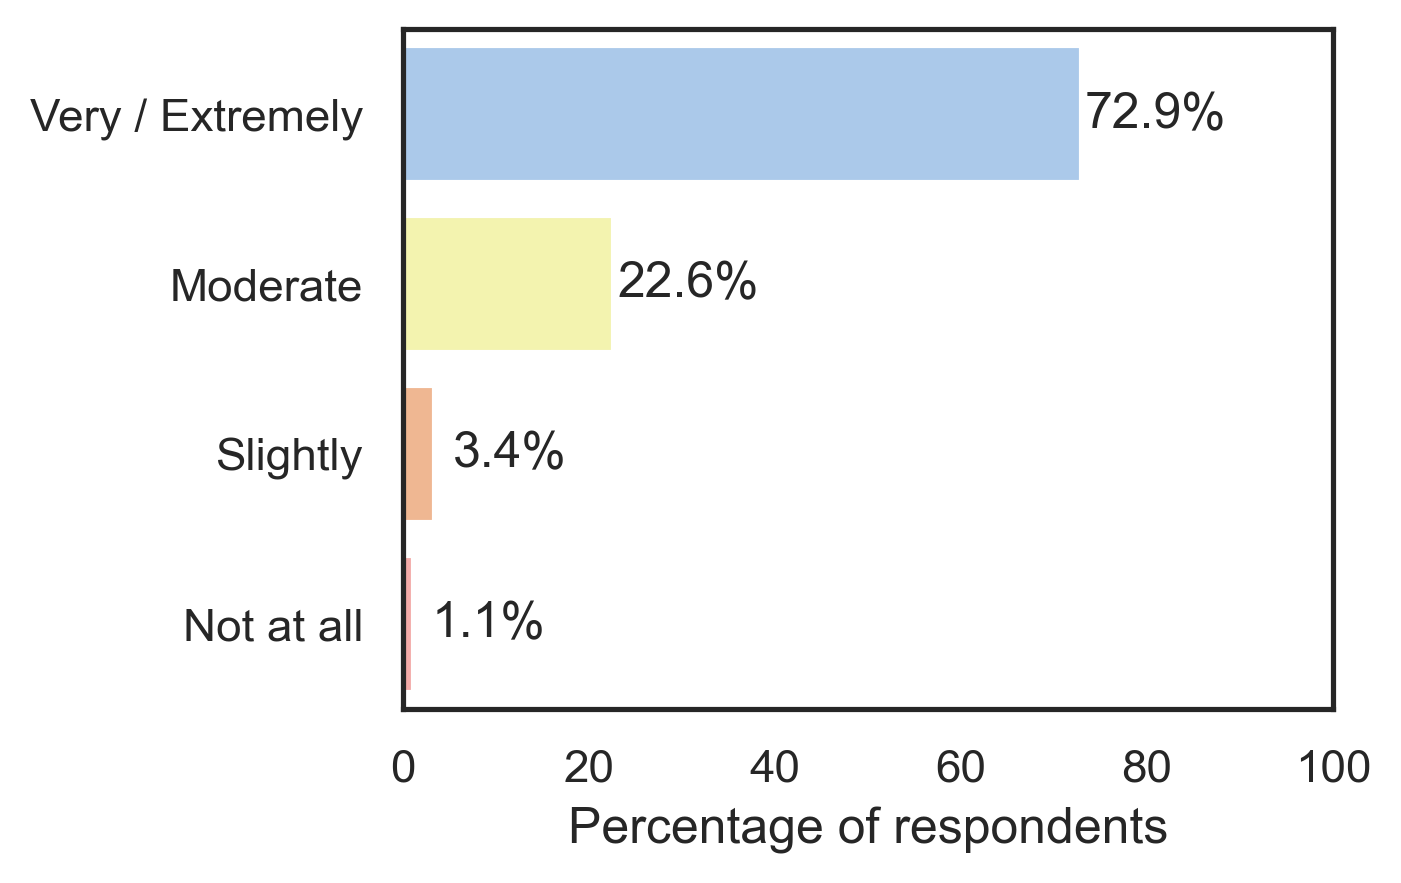

In [19]:
sns.set(font_scale=1)
sns.set_style('white')

df = pd.read_excel('../data/poster_data.xlsx', \
                   sheet_name='4.2')[::-1]

fig,ax = plt.subplots(figsize=(4,3))

pastel_palette = sns.color_palette("pastel")
selected_colors = [pastel_palette[0], pastel_palette[8], pastel_palette[1], pastel_palette[3]]


sns.barplot(y='Name',x='Percentage', orient='h',
            data=df, ax=ax, palette=selected_colors)

ax.set_ylabel('')
ax.set_xlim([0,100])
ax.set_xlabel('Percentage of respondents')


for idx, p in enumerate(ax.patches):
    width = p.get_width()

    percentage_value = df.iloc[idx]['Percentage']

    ax.annotate(f'{percentage_value}%', (width, p.get_y() + p.get_height() / 2),
                ha='center', va='center', xytext=(18, 0), textcoords='offset points')

Text(0.5, 0, '')

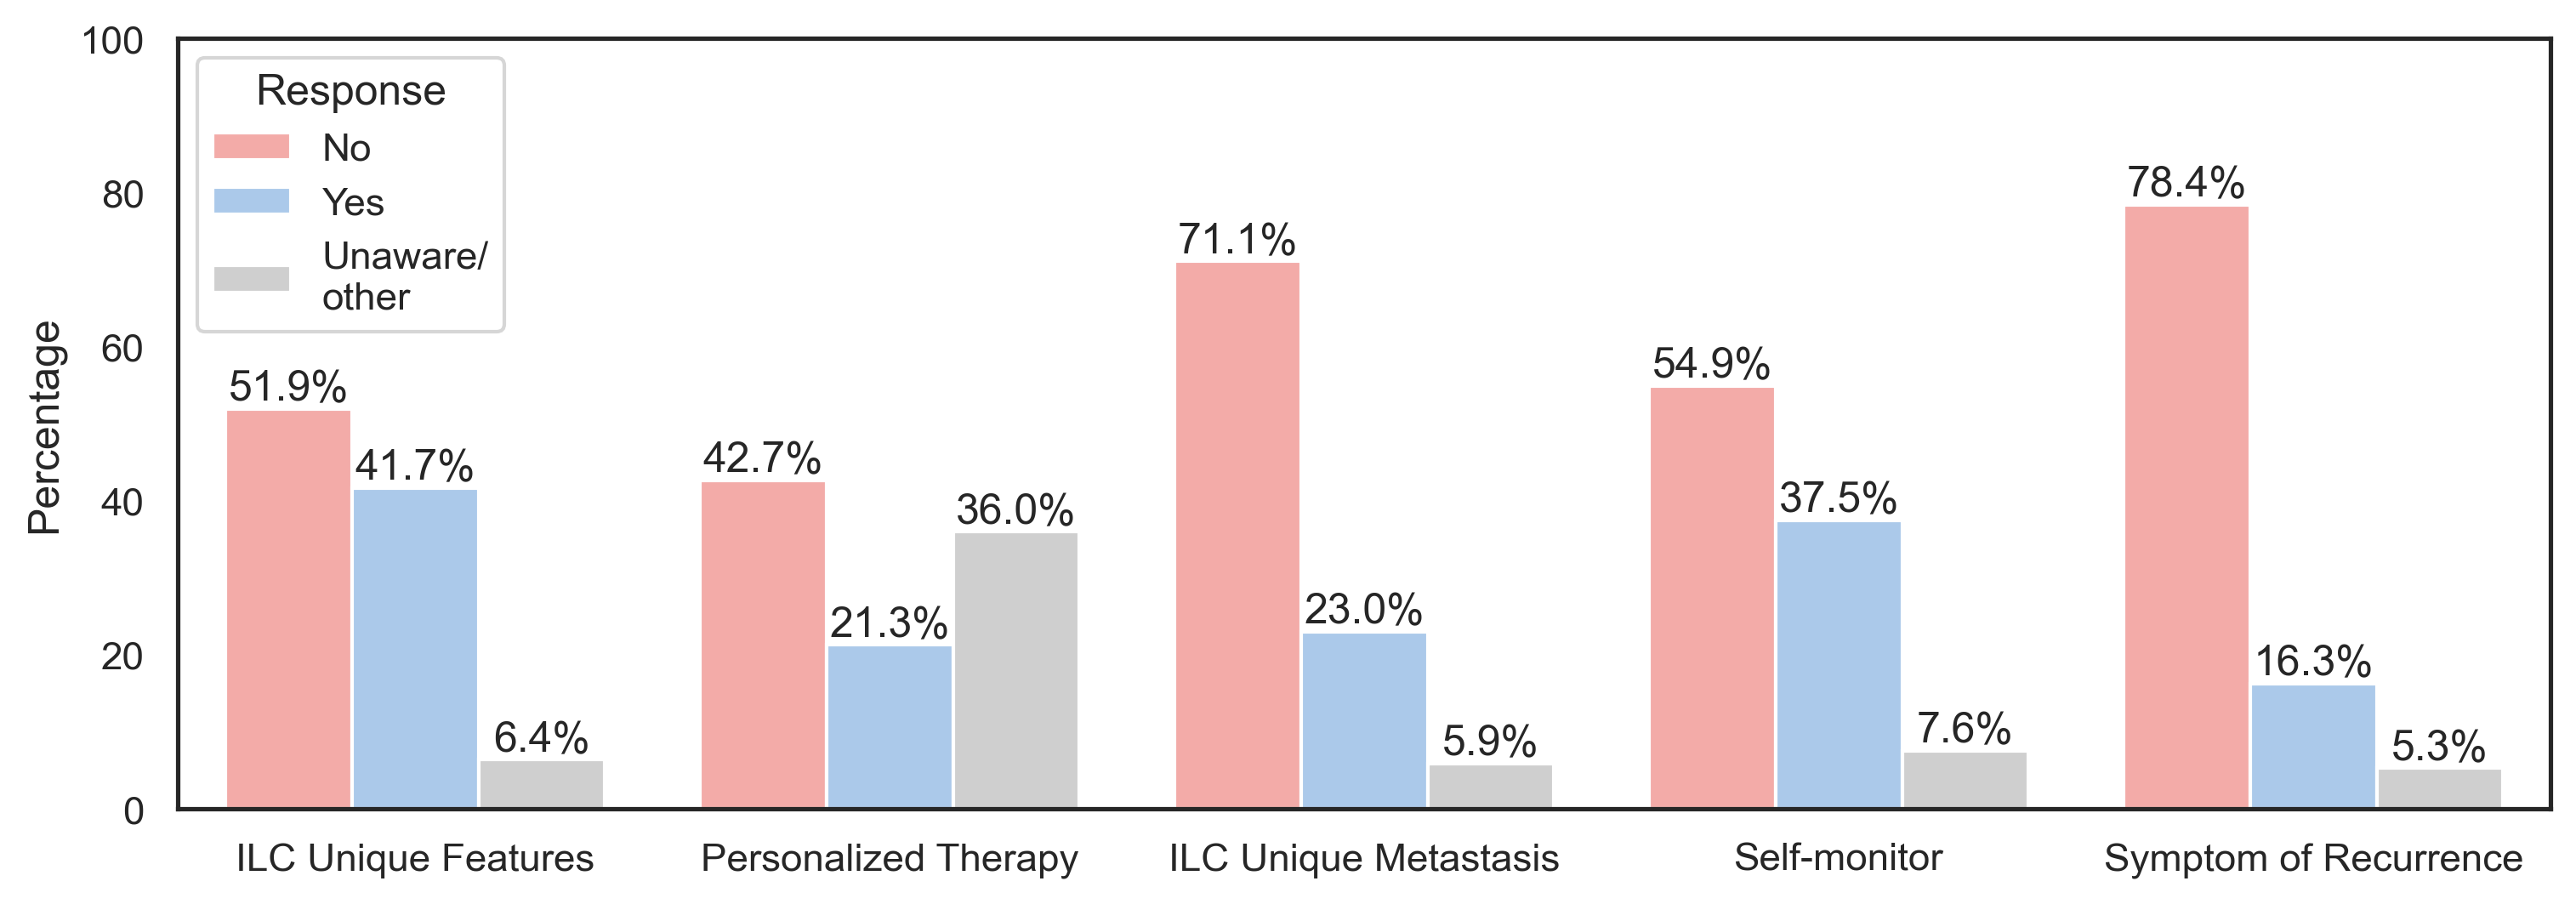

In [20]:
sns.set(font_scale=1)
sns.set_style('white')

df = pd.read_excel('../data/poster_data.xlsx', \
                   sheet_name='5')

fig,ax = plt.subplots(figsize=(12,4))
ax.set_ylim([0,100])

pastel_palette = sns.color_palette("pastel")
selected_colors = [pastel_palette[3], pastel_palette[0], pastel_palette[7]]

sns.barplot(x='Question',hue='Response', y='Percentage',orient='v',
            data=df, ax=ax, palette=selected_colors)

num_responses = df['Response'].nunique()

# Width of each bar
bar_width = 1 / (num_responses + 1)  # plus one for spacing

for i in ax.containers:
    ax.bar_label(i, fmt='%.1f%%')

ax.set_xlabel('')

# Topic Consensus (DatS7)

In [21]:
df = pd.read_csv('../data/dataS7.csv', index_col=0)
df

Physicians  \
Therapy, Treatment Resistance and Disease Progr...          43   
Identifying strategies to improve ILC screening...          68   
Impact of obesity and lifestyle factors on risk...          38   
Examining use of E-cadherin/p120 expression                 52   
Improving diagnosis and understanding of mixed ...          50   
Understanding the use of artificial intelligence            41   
Role of genomic predictors for ILC prognosis an...          75   
Identifying strategies to improve ILC screening...          73   
Identifying mechanisms of metastases                        71   
Determining mechanisms of endocrine resistance ...          81   
Identification of novel therapeutic targets and...          78   
Determining utility of immunotherapy in ILC                 65   
Understanding value of liquid biopsies in patie...          52   
Characterizing chemotherapy in ILC, and underst...          74   
Determining mechanisms of dormancy and risk for...          70   
Developing and testing lifestyle interventions              34   
Optimizing current breast cancer screening moda...          62   
Identifying new and specific imaging tools for ILC          65   
Studying the importance of breast density                   44   
Determining the utility of MRI                              65   
Determining how to reduce the high positive mar...          66   
Characterizing further whether breast conservat...          52   
Determining whether radiotherapy can replace ax...          57   
Characterizing  difference in post-mastectomy r...          50   
Determining cell of origin for ILC                          39   
Development of a centralized ILC data and tissu...          56   
Developing and characterizing ILC models                    47   
Characterizing differences in the tumor microen...          54   
Understanding of LCIS as a precursor ILC                    43   
Characterizing subtypes of ILC (pleomorphic, mi...          47   
Understanding of the unique etiology of ILC                 46   

                                                    Lab-based Researchers  \
Therapy, Treatment Resistance and Disease Progr...                     50   
Identifying strategies to improve ILC screening...                     73   
Impact of obesity and lifestyle factors on risk...                     38   
Examining use of E-cadherin/p120 expression                            55   
Improving diagnosis and understanding of mixed ...                     56   
Understanding the use of artificial intelligence                       37   
Role of genomic predictors for ILC prognosis an...                     78   
Identifying strategies to improve ILC screening...                     73   
Identifying mechanisms of metastases                                   75   
Determining mechanisms of endocrine resistance ...                     80   
Identification of novel therapeutic targets and...                     81   
Determining utility of immunotherapy in ILC                            60   
Understanding value of liquid biopsies in patie...                     56   
Characterizing chemotherapy in ILC, and underst...                     67   
Determining mechanisms of dormancy and risk for...                     73   
Developing and testing lifestyle interventions                         32   
Optimizing current breast cancer screening moda...                     60   
Identifying new and specific imaging tools for ILC                     68   
Studying the importance of breast density                              42   
Determining the utility of MRI                                         58   
Determining how to reduce the high positive mar...                     60   
Characterizing further whether breast conservat...                     50   
Determining whether radiotherapy can replace ax...                     52   
Characterizing  difference in post-mastectomy r...                     42   
Determining ce

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/seaborn/matrix.py:1203: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(**tight_params)


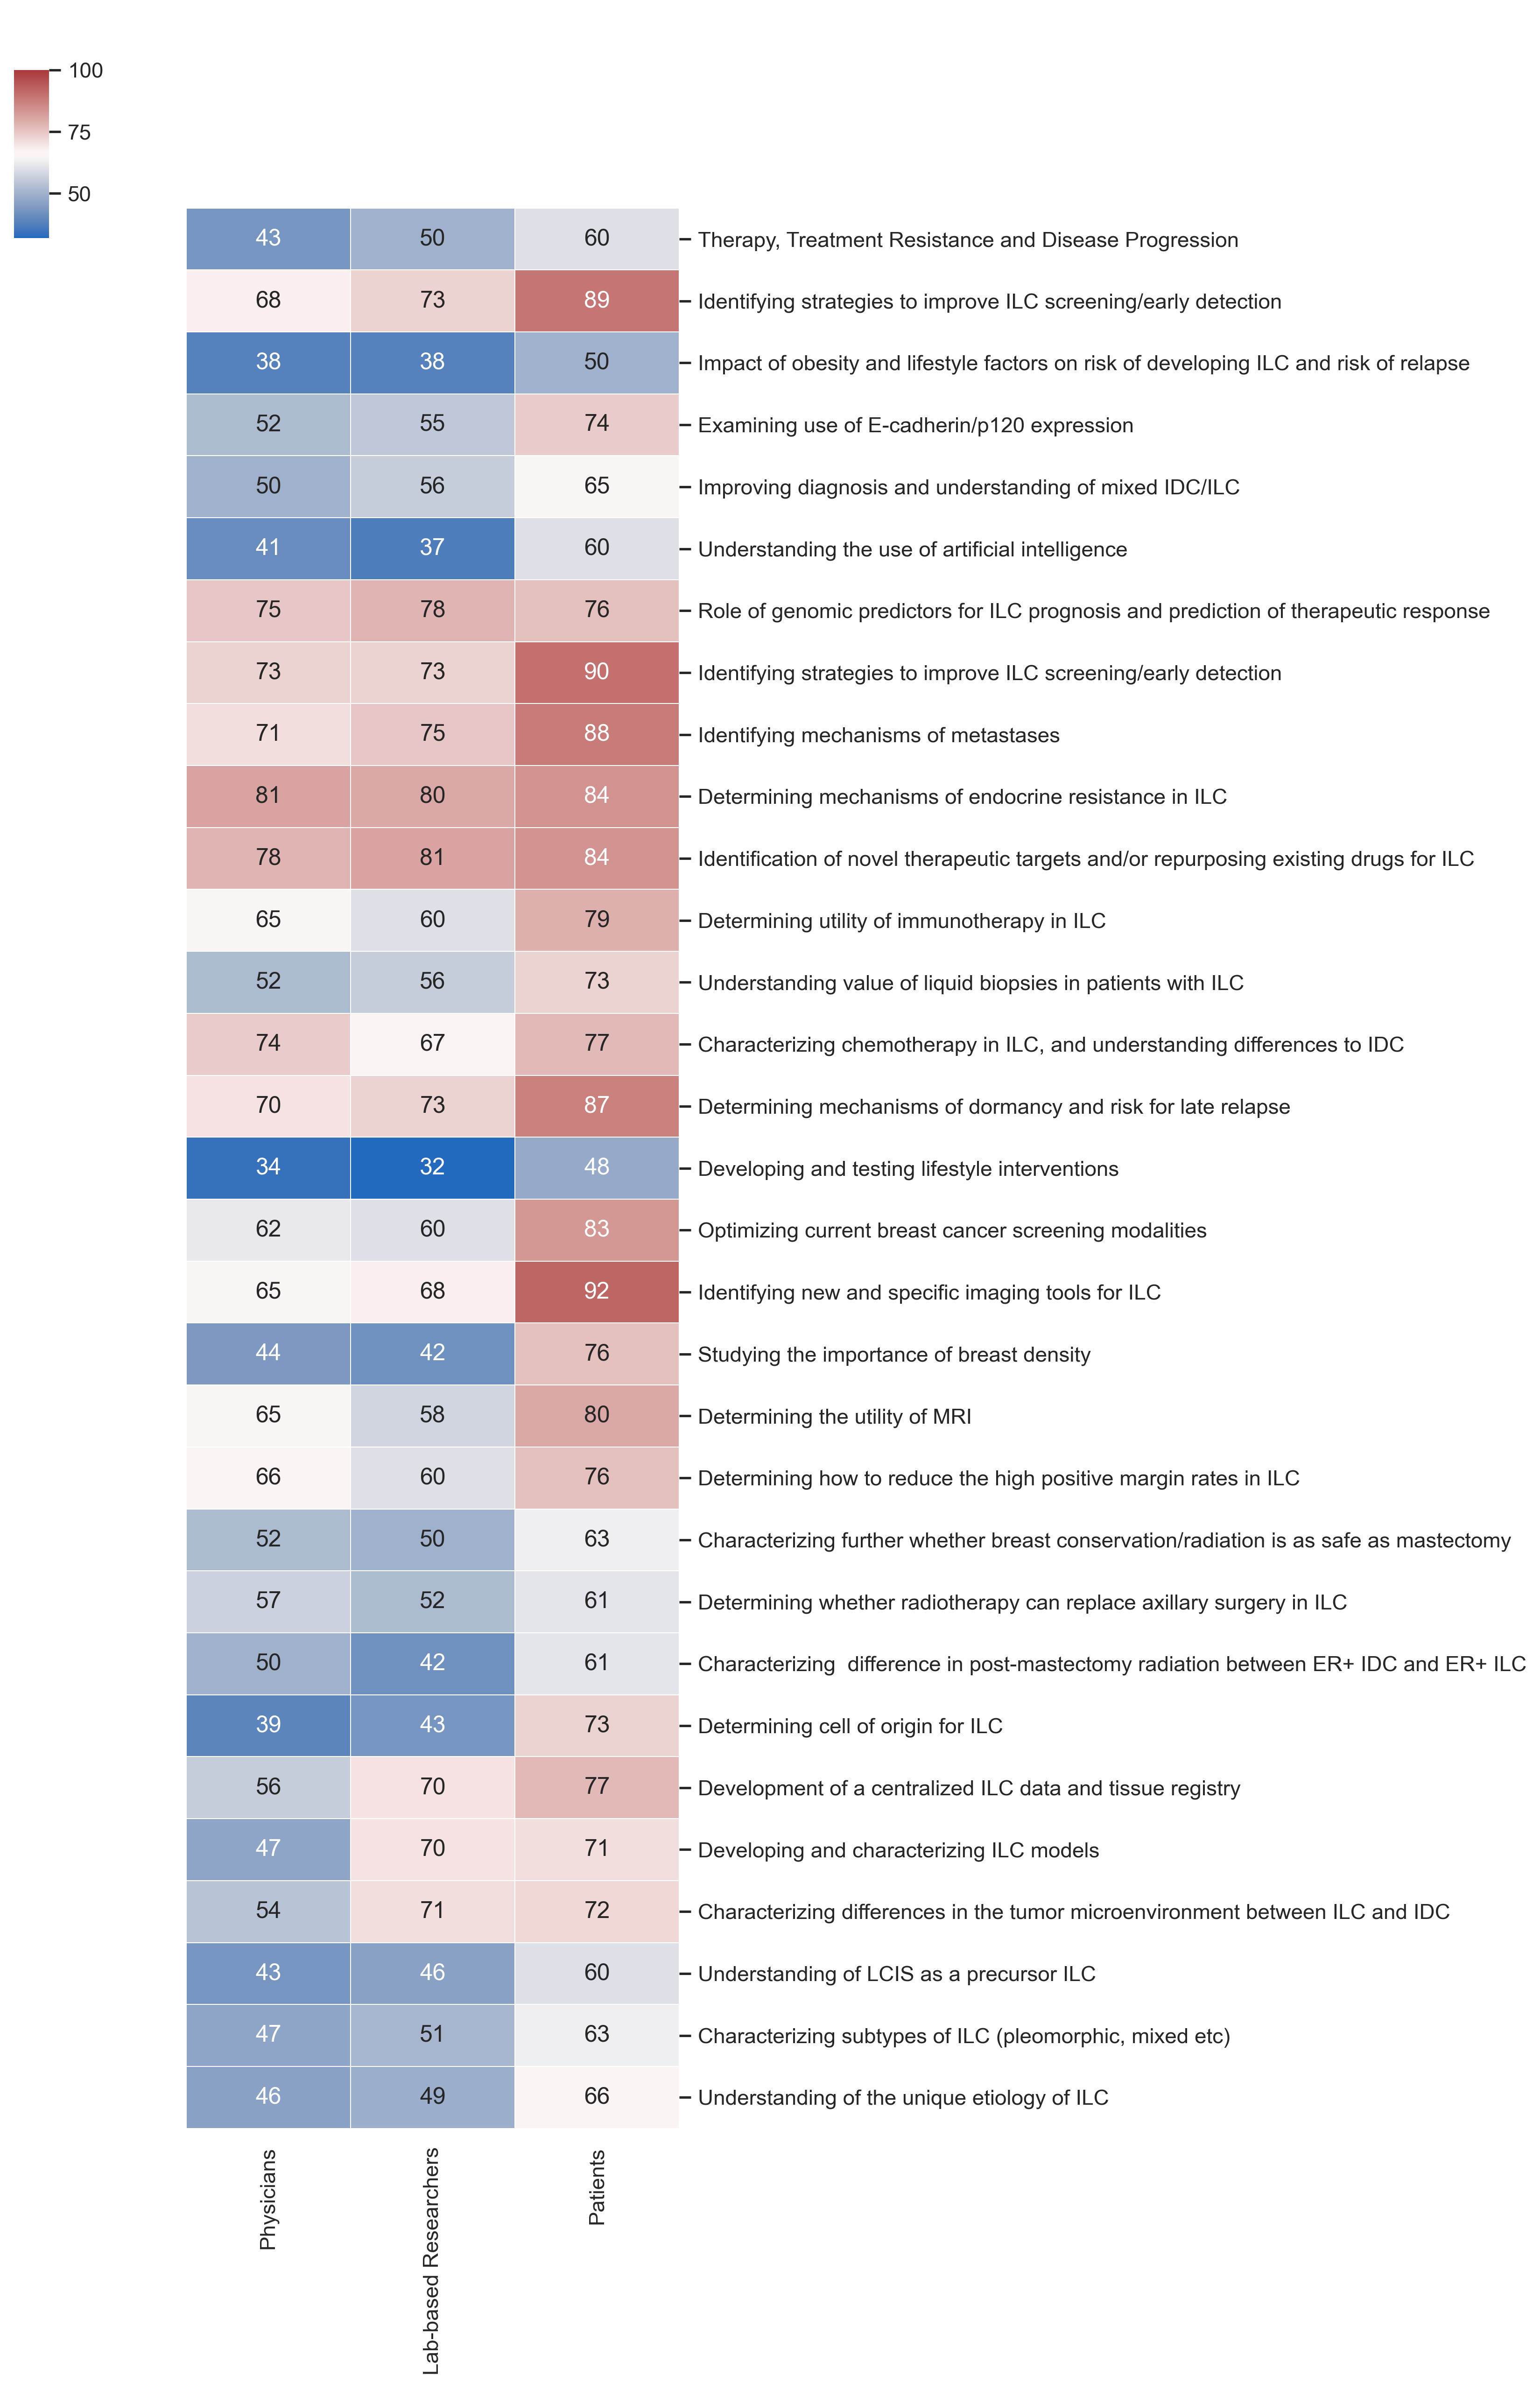

In [22]:
g = sns.clustermap(df.iloc[:,:-1], cmap='vlag', vmax=100,
           figsize=(5,20), linewidth=.1, annot=True,
               row_cluster=False, col_cluster=False,dendrogram_ratio=.001)

g.cax.set_position([-.05, .8, .05, .06])